# Descriptors and Models

## Best Combos

### Top-1% acquired

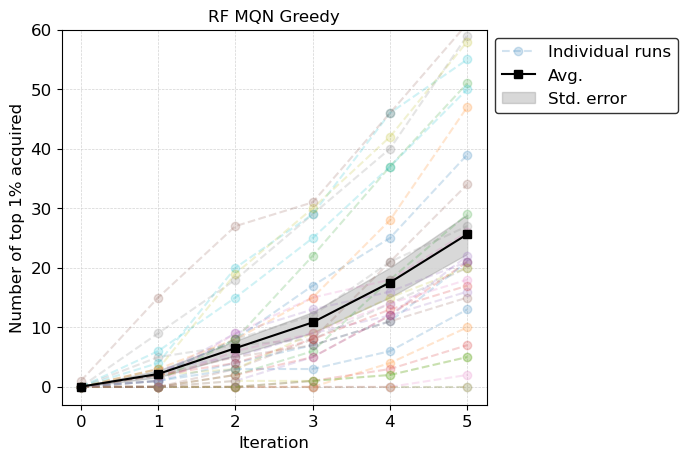

In [12]:
import importlib
import pandas as pd
import GrapherCode as gc
import glob
import matplotlib.pyplot as plt

importlib.reload(gc)

files = gc.get_files('01_BestCombosDTP')
data = gc.get_data(files)

key = '01_BestCombosDTP/RF MQN Greedy'

data_single = {key: data[key]}
graph = gc.plot_compact_graphs(
    data_single,
    graphs_per_row=1,
    dpi=100,
    label_size=12,
    title_size=12,
    legend_size=12,
    tick_size=12,
)
graph.set_size_inches(5, 5)
graph.savefig('x_figures/DtpBestSingle.png', bbox_inches='tight')

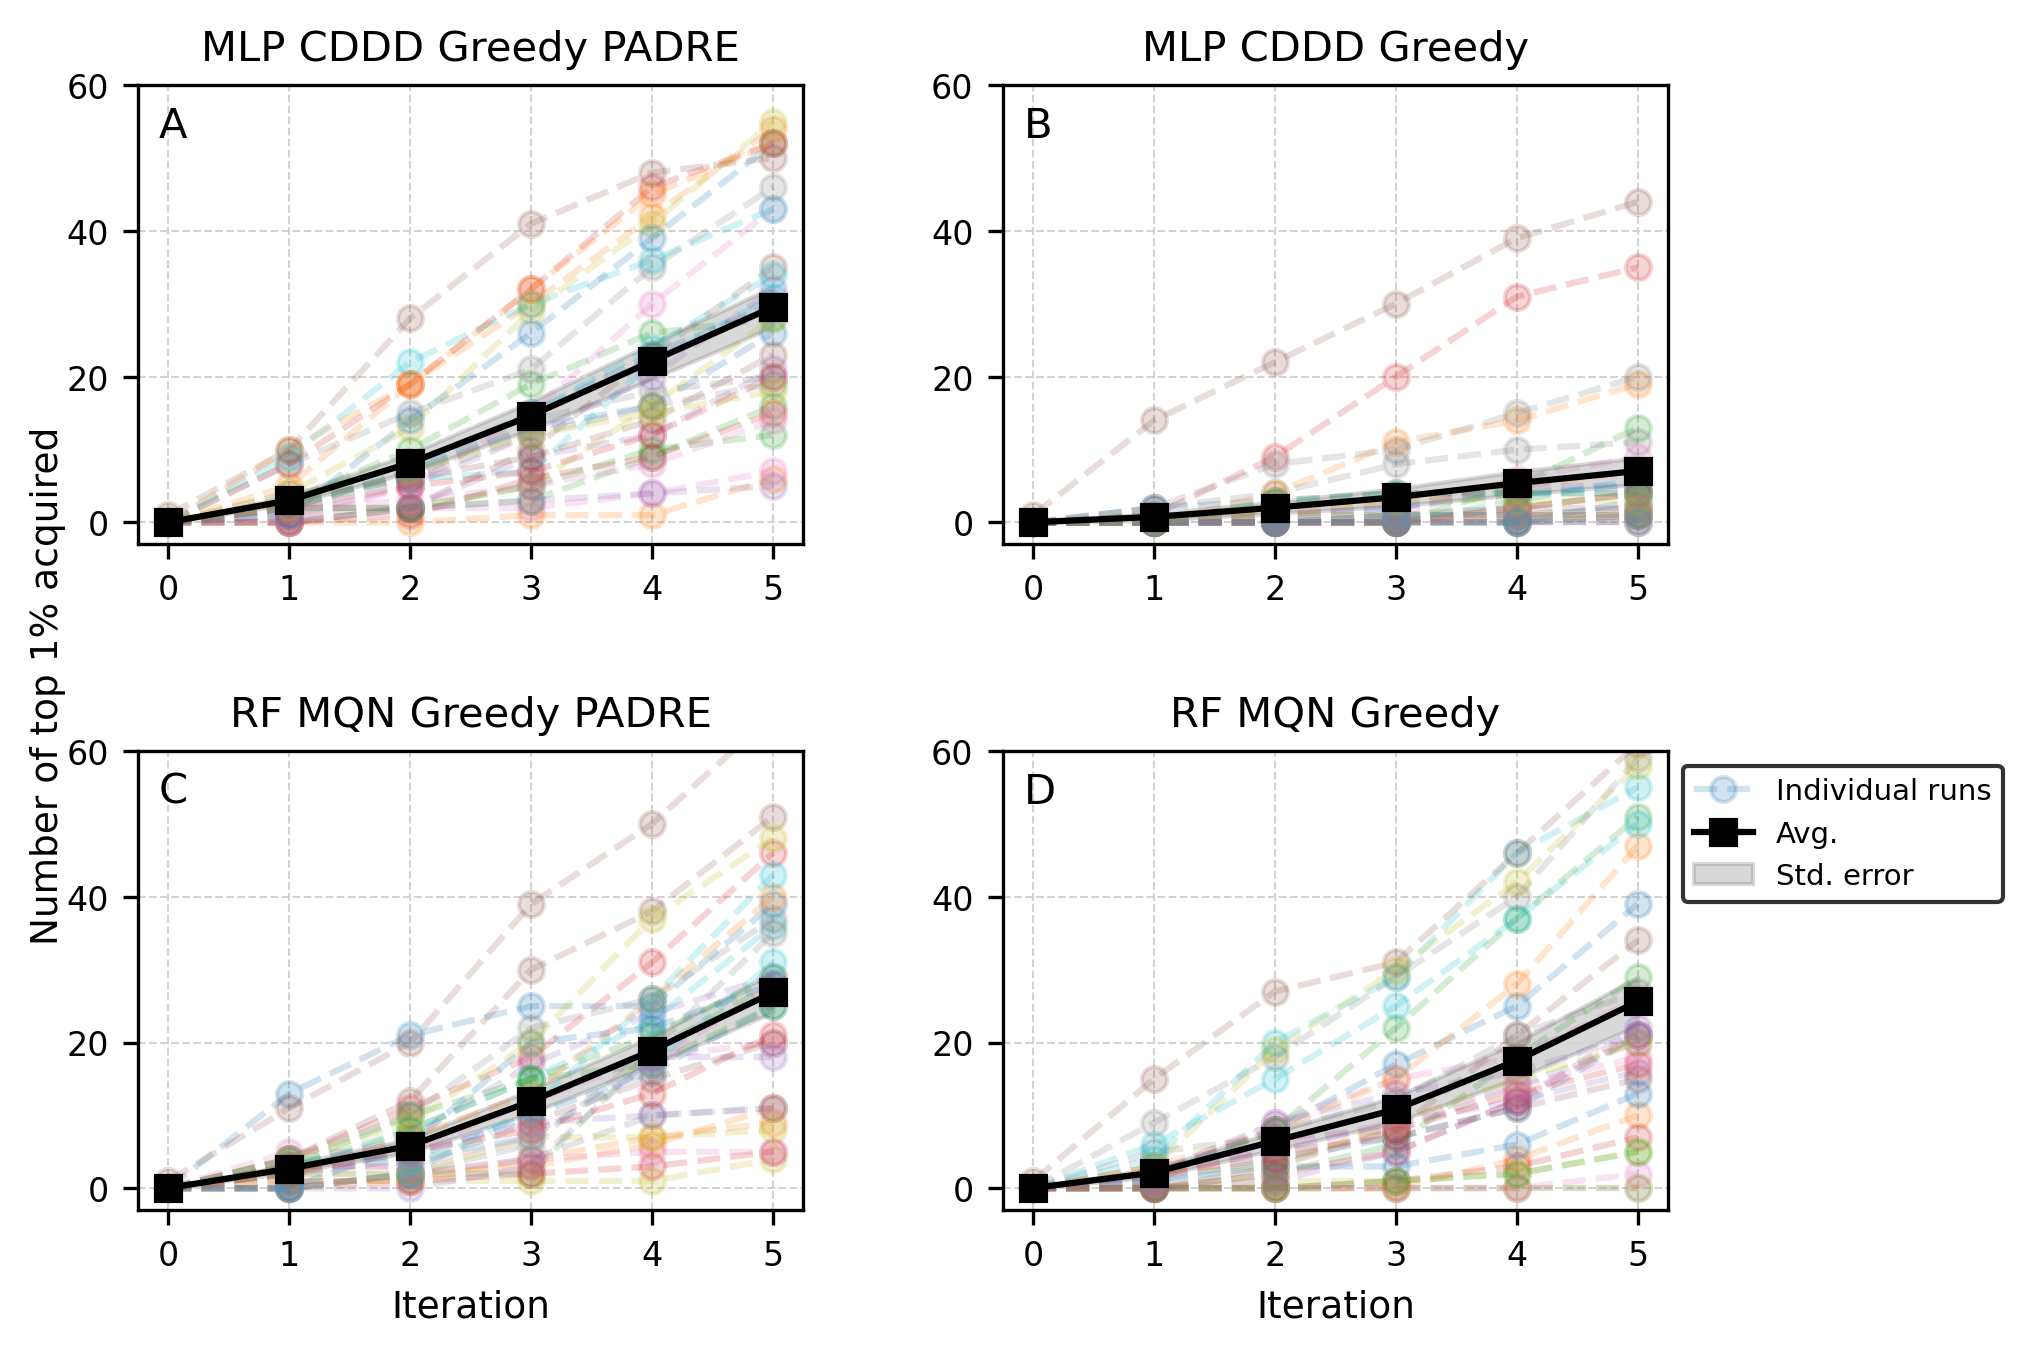

In [13]:
import importlib
import pandas as pd
import GrapherCode as gc
import glob
import matplotlib.pyplot as plt

importlib.reload(gc)

files = gc.get_files('01_BestCombosDTP')
data = gc.get_data(files)

TableNorm = gc.table_data(files)

graph = gc.plot_compact_graphs(data, graphs_per_row=2, dont_sort=False)
graph.set_size_inches(6, 5)
graph.savefig('x_figures/DtpBestCombos.png', bbox_inches='tight')

### Probability

In [14]:
data_prob = gc.get_probability_data(files)
data_prob = gc.reorganize_data(data_prob)

# key = 'Prob >= 20'

# data_prob_single = {key: data_prob[key]}

# prob_graph = gc.plot_probability_graphs(
#     data_prob_single, 
#     graphs_per_row=1, 
#     label_size=14, 
#     emph_data={'MLP CDDD Greedy PADRE', 'RF MQN Greedy PADRE'},
#     error_style='bar',
#     custom_ylabel=False
#     )
# prob_graph.set_size_inches(7, 4)
# prob_graph.savefig('x_figures/DtpProbSingle.png', bbox_inches='tight')

\begin{table}[htbp]
\centering
\scriptsize % or \footnotesize, \tiny if needed
\setlength{\tabcolsep}{3pt} % adjust as needed to reduce horizontal space
\begin{tabular}{l cccccc c cccccc c cccccc}
\toprule
& \multicolumn{6}{c}{$\leq 1$ hit} & & \multicolumn{6}{c}{$\leq 5$ hits} & & \multicolumn{6}{c}{$\leq 20$ hits}\\
\cmidrule(lr){2-7}\cmidrule(lr){9-14}\cmidrule(lr){16-21}
& 0 & 1 & 2 & 3 & 4 & 5 & & 0 & 1 & 2 & 3 & 4 & 5 & & 0 & 1 & 2 & 3 & 4 & 5 \\
\midrule
MLP CDDD Greedy      & 0.03 & 0.23 & 0.47 & 0.60 & 0.80 & 0.90 & & 0.00 & 0.03 & 0.10 & 0.17 & 0.30 & 0.37 & & 0.00 & 0.00 & 0.03 & 0.07 & 0.07 & 0.10 \\
MLP CDDD Greedy PADRE & 0.03 & 0.80 & 0.97 & 1.00 & 1.00 & 1.00 & & 0.00 & 0.20 & 0.67 & 0.87 & 0.90 & 1.00 & & 0.00 & 0.00 & 0.07 & 0.27 & 0.50 & 0.70 \\
RF MQN Greedy        & 0.03 & 0.63 & 0.80 & 0.87 & 0.90 & 0.93 & & 0.00 & 0.13 & 0.50 & 0.73 & 0.77 & 0.90 & & 0.00 & 0.00 & 0.07 & 0.20 & 0.33 & 0.60 \\
RF MQN Greedy PADRE  & 0.03 & 0.73 & 0.97 & 1.00 & 1.00 & 1.00 & & 0.00

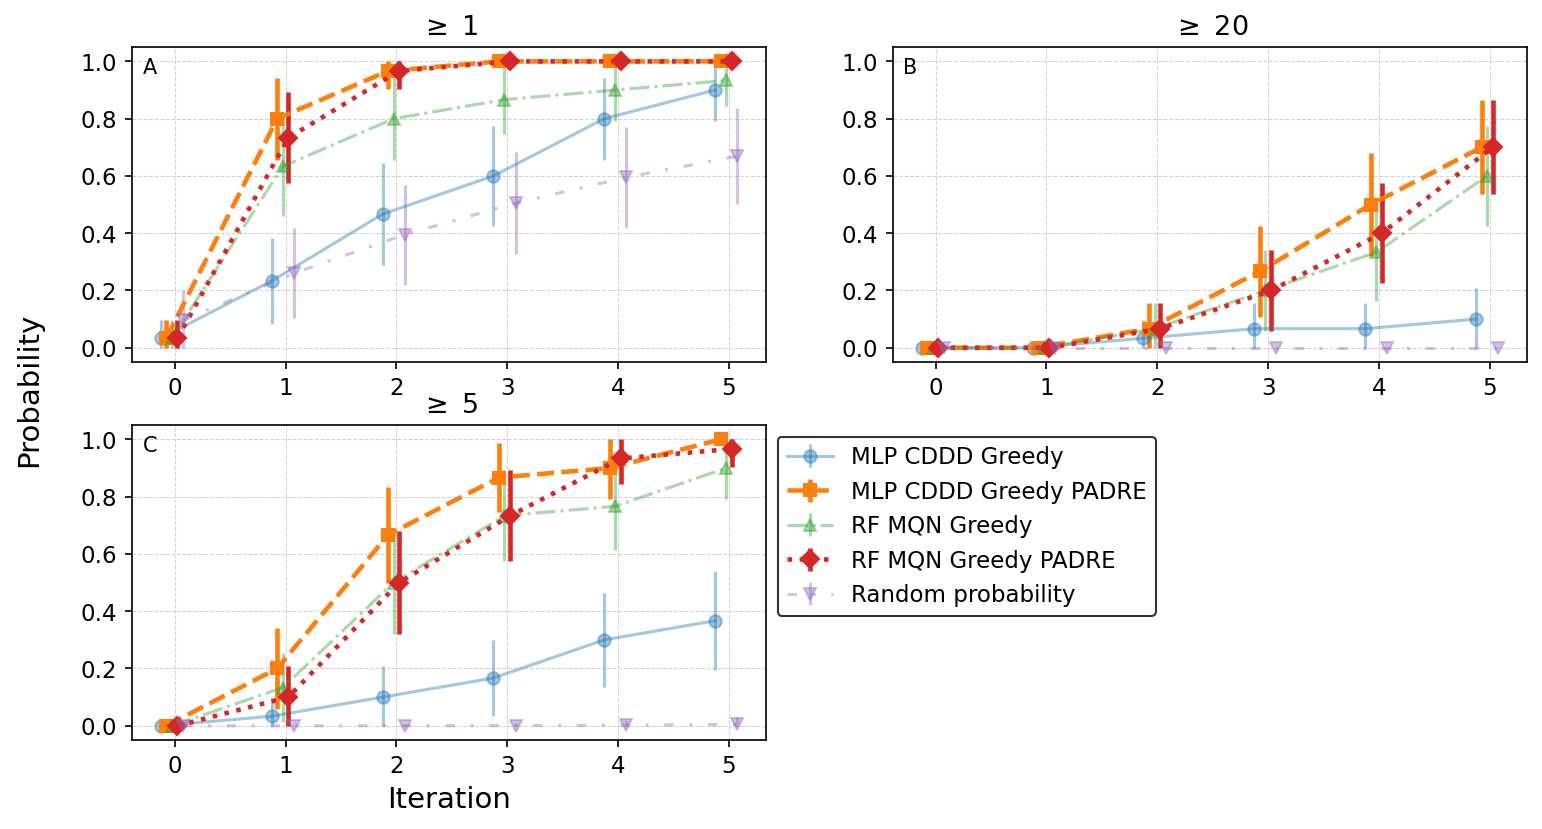

In [15]:
prob_graph = gc.plot_probability_graphs(
    data_prob, 
    graphs_per_row=2, 
    label_size=14, 
    emph_data={'MLP CDDD Greedy PADRE', 'RF MQN Greedy PADRE', 'analytical_test'},
    error_style='bar',
    #ylim=(-0.05, 0.5)
)
prob_graph.savefig('x_figures/DtpBestCombosProb.png')

df_le1 = data_prob.get('Prob >= 1').T.round(2)
df_le5 = data_prob.get('Prob >= 5').T.round(2)
df_le20 = data_prob.get('Prob >= 20').T.round(2)

print(gc.create_probability_table_leq(df_le1, df_le5, df_le20))

# Acquisition Functions

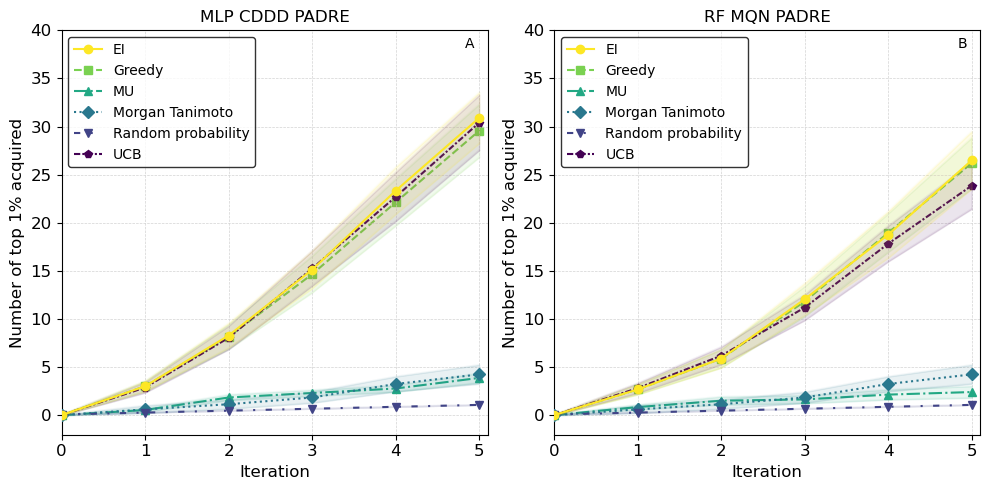

In [28]:
filesMLP = gc.get_files('01_BestCombosDTP/AcquisitionFunctionTestsMLPCDDD')
dataMLP = gc.get_data(filesMLP)
filesRF = gc.get_files('01_BestCombosDTP/AcquisitionFunctionTestsRFMQN')
dataRF = gc.get_data(filesRF)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].annotate(
    "A",
    xy=(0.93, 1), xycoords='axes fraction',
    xytext=(+0.5, -0.5), textcoords='offset fontsize',
    fontsize='medium', verticalalignment='top',
    #bbox=dict(facecolor='0.7', edgecolor='none', pad=3.0)
)

axes[1].annotate(
    "B",
    xy=(0.93, 1), xycoords='axes fraction',
    xytext=(+0.5, -0.5), textcoords='offset fontsize',
    fontsize='medium', verticalalignment='top',
    #bbox=dict(facecolor='0.7', edgecolor='none', pad=3.0)
)

# Plot into the first subplot
gc.plot_single_graph(
    dataMLP,
    title='MLP CDDD PADRE',
    ax=axes[0], 
    legend_size=10,
    tick_size=12,
    label_size=12,
    ylim=(-2, 40),
)

# Plot into the second subplot
gc.plot_single_graph(
    dataRF,
    title='RF MQN PADRE',
    ax=axes[1], 
    legend_size=10,
    title_size=12,
    tick_size=12,
    label_size=12,
    ylim=(-2, 40),
)

plt.tight_layout()
plt.show()
fig.savefig('x_figures/DtpAcquisitionFunctions.png')

### Probablities

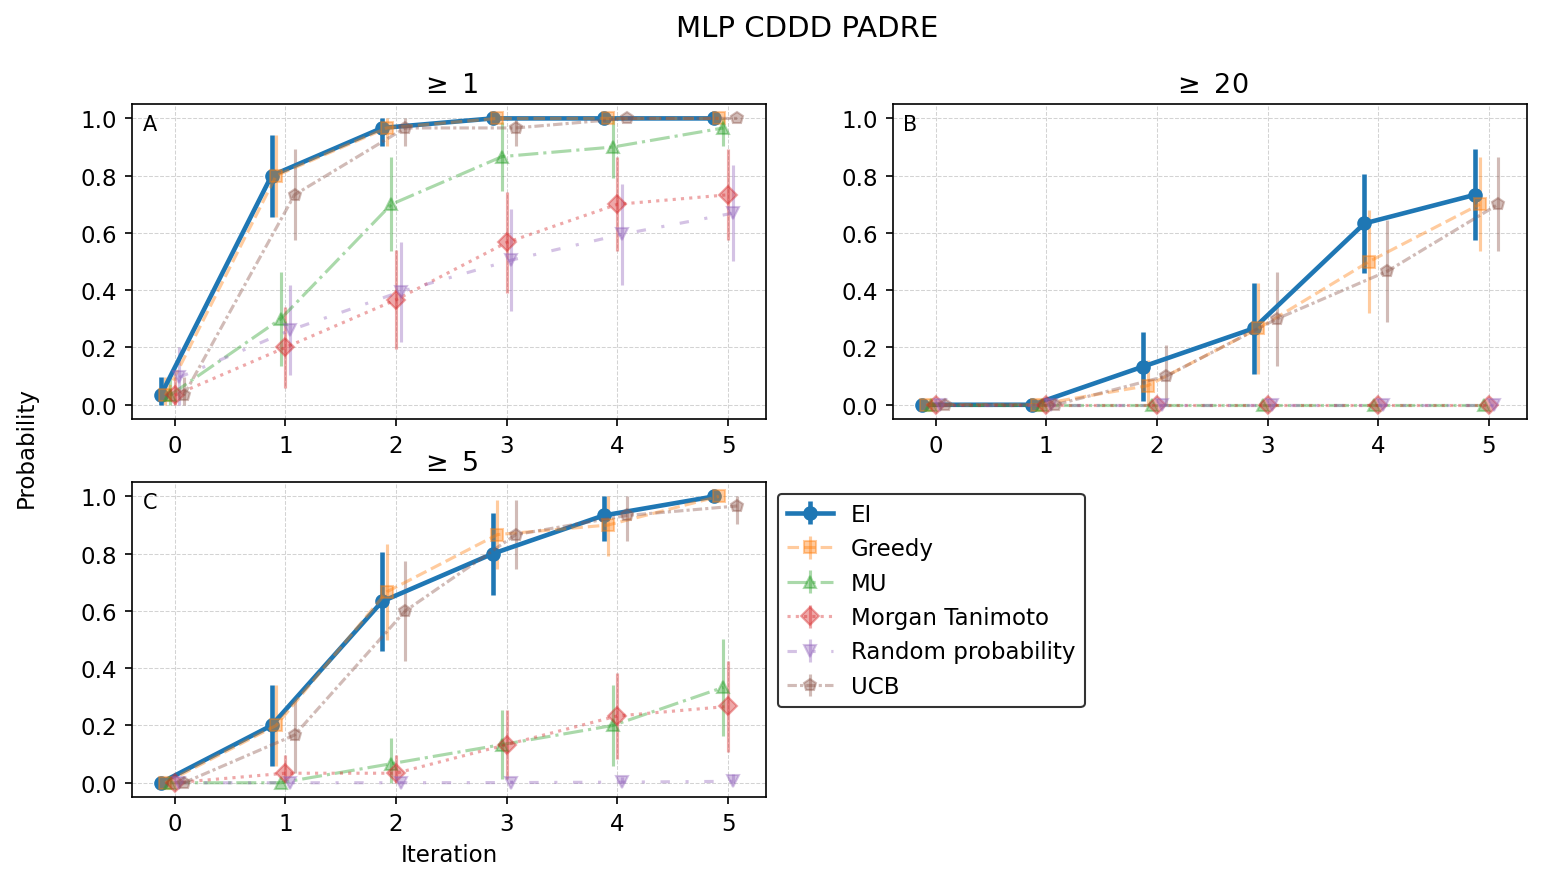

In [19]:
data_prob_MLP = gc.get_probability_data(filesMLP)
data_prob_MLP = gc.reorganize_data(data_prob_MLP)
graph_prob_MLP = gc.plot_probability_graphs(
    data_prob_MLP, graphs_per_row=2, error_style="bar", emph_data={"EI"}
)
graph_prob_MLP.suptitle('MLP CDDD PADRE', fontsize=14)
graph_prob_MLP.savefig("x_figures/DtpAcquisitionFunctionsProb", bbox_inches='tight')

# Noise Perturbation

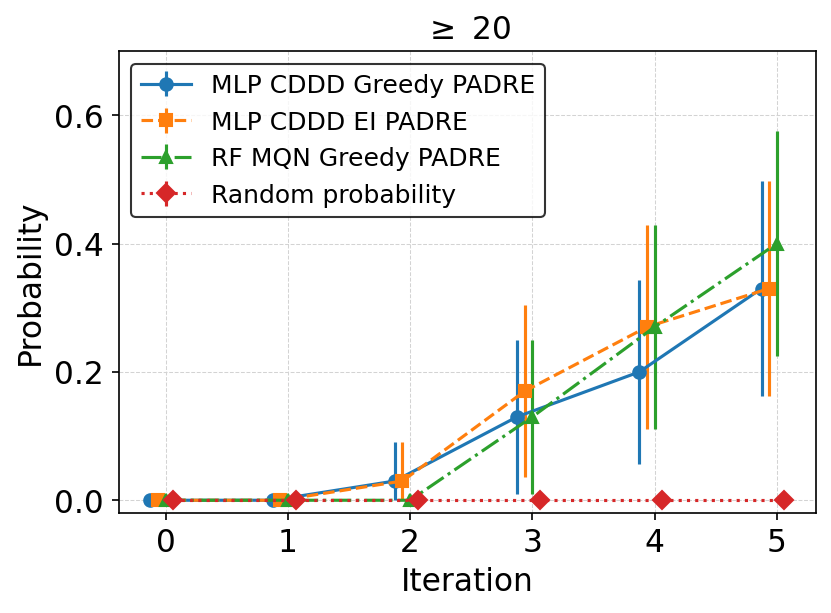

In [20]:
importlib.reload(gc)
filesCDDD = gc.get_files('01_BestCombosDTP/NoiseTestsMLPCDDD')
filesCDDDEI = gc.get_files('01_BestCombosDTP/NoiseTestsMLPCDDD-EI')
filesMQN = gc.get_files('01_BestCombosDTP/NoiseTestsRFMQN')

data_prob_noise_CDDD = gc.get_probability_data(filesCDDD)
data_prob_noise_CDDD = gc.reorganize_data(data_prob_noise_CDDD)

data_prob_noise_CDDD_EI = gc.get_probability_data(filesCDDDEI)
data_prob_noise_CDDD_EI = gc.reorganize_data(data_prob_noise_CDDD_EI)

data_prob_noise_MQN = gc.get_probability_data(filesMQN)
data_prob_noise_MQN = gc.reorganize_data(data_prob_noise_MQN)

series_CDDD = data_prob_noise_CDDD.get('Prob >= 20')['noise 1']
series_CDDD_EI = data_prob_noise_CDDD_EI.get('Prob >= 20')['noise 1']
series_MQN = data_prob_noise_MQN.get('Prob >= 20')['noise 1']

df = pd.DataFrame([series_CDDD, series_CDDD_EI, series_MQN]).T.round(2)
df.columns = ['MLP CDDD Greedy PADRE', 'MLP CDDD EI PADRE', 'RF MQN Greedy PADRE']
df

my_dict = {'Prob >= 20': df}

fig = gc.plot_probability_graphs(
    my_dict, graphs_per_row=1, error_style="bar", ylim=(-0.02, 0.7),
    label_size=15, tick_size=15, title_size=15, legend_size=12,
    legend_on_plot=True, custom_ylabel=False, annotate_pos=(0.93, 1)
)
fig.set_size_inches(6, 4)
fig.savefig('x_figures/DtpNoise.png', bbox_inches='tight')

### Noise Table

In [21]:
# Rename the first row in the index column
tableCDDD = gc.table_data(filesCDDD)
tableCDDDEI = gc.table_data(filesCDDDEI)
tableMQN = gc.table_data(filesMQN)
tableMQN.rename(index={tableMQN.index[0]: 'RF MQN Greedy PADRE'}, inplace=True)

tableCDDD.rename(index={tableCDDD.index[0]: 'MLP CDDD Greedy PADRE'}, inplace=True)

tableCDDDEI.rename(index={tableCDDDEI.index[0]: 'MLP CDDD EI PADRE'}, inplace=True)

print(gc.generate_comparison_table([tableCDDD, tableCDDDEI, tableMQN]))

\begin{table}[ht]
\centering
\caption{Comparison across datasets.}
\resizebox{\textwidth}{!}{%
\begin{tabular}{lccccccccc}
\toprule
 & \multicolumn{3}{c}{MLP CDDD Greedy PADRE} & \multicolumn{3}{c}{MLP CDDD EI PADRE} & \multicolumn{3}{c}{RF MQN Greedy PADRE} \\
\cmidrule(lr){2-4}\cmidrule(lr){5-7}\cmidrule(lr){8-10}
 & Avg. & Std. dev. & Prob $\geq$ \{1, 5, 20\} & Avg. & Std. dev. & Prob $\geq$ \{1, 5, 20\} & Avg. & Std. dev. & Prob $\geq$ \{1, 5, 20\} \\
\midrule
No noise & 29.57 & 15.32 & 1.00, 0.97, 0.63 & 30.90 & 14.69 & 1.00, 1.00, 0.73 & 26.87 & 15.09 & 1.00, 0.90, 0.63 \\
Noise 1$\sigma$ & 15.40 & 11.78 & 1.00, 0.77, 0.30 & 16.33 & 11.89 & 1.00, 0.80, 0.27 & 17.70 & 11.71 & 0.97, 0.80, 0.40 \\
Noise 2$\sigma$ & 8.73 & 7.07 & 0.83, 0.53, 0.10 & 10.13 & 8.60 & 0.87, 0.60, 0.17 & 11.27 & 10.33 & 0.83, 0.57, 0.20 \\
Noise 3$\sigma$ & 4.00 & 4.04 & 0.77, 0.30, 0.00 & 4.30 & 4.41 & 0.63, 0.23, 0.00 & 4.77 & 4.94 & 0.67, 0.30, 0.00 \\
\bottomrule
\end{tabular}%
}
\label{tab:comparison_

# Data Enrichment

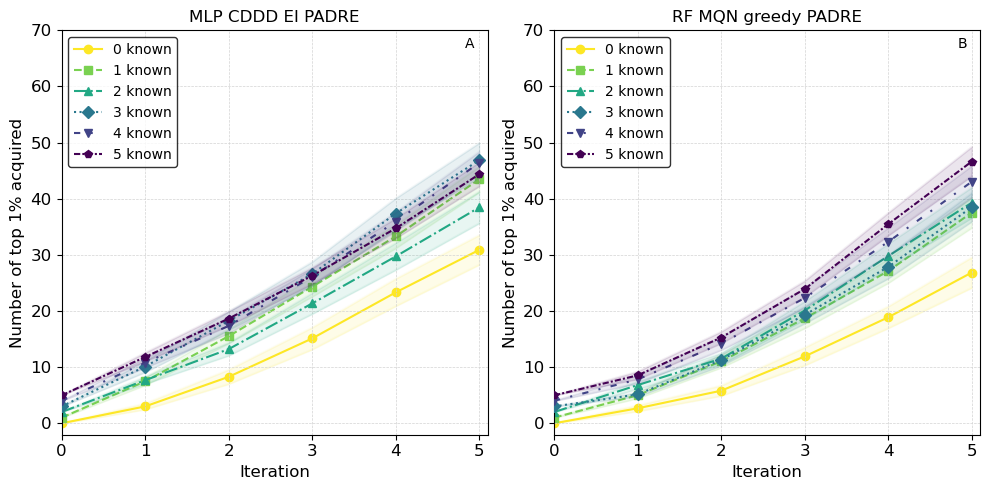

In [22]:
filesMLPEI_enrich = gc.get_files('all_PADRE/130k/Enrichment03/EnrichmentAnalysis_MLP_CDDD_EI-padre')
dataMLP_enrich = gc.get_data(filesMLPEI_enrich)
filesRF_enrich = gc.get_files('all_PADRE/130k/Enrichment03/EnrichmentAnalysis_RF_MQN_greedy-padre')
dataRF_enrich = gc.get_data(filesRF_enrich)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].annotate(
    "A",
    xy=(0.93, 1), xycoords='axes fraction',
    xytext=(+0.5, -0.5), textcoords='offset fontsize',
    fontsize='medium', verticalalignment='top',
    # bbox=dict(facecolor='0.7', edgecolor='none', pad=3.0)
)

axes[1].annotate(
    "B",
    xy=(0.93, 1), xycoords='axes fraction',
    xytext=(+0.5, -0.5), textcoords='offset fontsize',
    fontsize='medium', verticalalignment='top',
    # bbox=dict(facecolor='0.7', edgecolor='none', pad=3.0)
)

# Plot into the first subplot
gc.plot_single_graph(
    dataMLP_enrich,
    title='MLP CDDD EI PADRE',
    ax=axes[0], 
    legend_size=10,
    tick_size=12,
    label_size=12,
    ylim=(-2, 70),
)

# Plot into the second subplot
gc.plot_single_graph(
    dataRF_enrich,
    title='RF MQN greedy PADRE',
    ax=axes[1], 
    legend_size=10,
    title_size=12,
    tick_size=12,
    label_size=12,
    ylim=(-2, 70),
)

plt.tight_layout()
plt.show()
fig.savefig('x_figures/DtpDataEnrichment.png')